In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
data = pd.read_csv("/content/Daily Household Transactions.csv")
data

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,20/09/2018 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR
1,20/09/2018 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR
2,19/09/2018,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR
3,17/09/2018 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
4,16/09/2018 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR
...,...,...,...,...,...,...,...,...
2456,1/1/2015,Cash,Transportation,NaN,share jeep - Place T base to top,20.0,Expense,INR
2457,1/1/2015,Cash,Transportation,NaN,share auto - Place H to Place T base,20.0,Expense,INR
2458,1/1/2015,Cash,Transportation,NaN,bus - brc to Place H,30.0,Expense,INR
2459,1/1/2015,Cash,Food,NaN,tea,10.0,Expense,INR


In [5]:
data['Date']=pd.to_datetime(data['Date'],errors='coerce')
data = data.dropna(subset=['Date'])

<ipython-input-5-7f9e682ad226>:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date']=pd.to_datetime(data['Date'],errors='coerce')


In [6]:
data.head()

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,2018-09-20 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR
1,2018-09-20 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR
3,2018-09-17 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
4,2018-09-16 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR
5,2018-09-15 06:34:17,Credit Card,subscription,Tata Sky,Permanent Residence - Tata Play recharge,200.0,Expense,INR


In [7]:
data.describe()

,Date,Amount
count,1303,1303.000000
mean,2017-05-12 20:41:38.546431232,3076.396892
min,2015-01-13 18:52:47,2.000000
25%,2016-12-18 20:18:45.500000,30.000000
50%,2017-07-27 20:05:23,72.000000
75%,2018-01-30 12:09:30.500000,298.500000
max,2018-09-20 12:04:08,250000.000000
std,NaN,14608.948853


In [10]:
data.isnull().sum()

Date                0
Mode                0
Category            0
Subcategory       262
Note              141
Amount              0
Income/Expense      0
Currency            0
dtype: int64

In [13]:
data['Subcategory'].fillna('Unknown', inplace=True)
data['Note'].fillna('Unknown', inplace=True)


<ipython-input-13-bf80c4cb8a68>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Subcategory'].fillna('Unknown', inplace=True)
<ipython-input-13-bf80c4cb8a68>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Note'].fillna('Unknown', inplace=True)


In [15]:
data.isnull().sum()

Date              0
Mode              0
Category          0
Subcategory       0
Note              0
Amount            0
Income/Expense    0
Currency          0
dtype: int64

In [16]:
data=data.drop_duplicates()
data

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1303 entries, 0 to 2420
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            1303 non-null   datetime64[ns]
 1   Mode            1303 non-null   object        
 2   Category        1303 non-null   object        
 3   Subcategory     1303 non-null   object        
 4   Note            1303 non-null   object        
 5   Amount          1303 non-null   float64       
 6   Income/Expense  1303 non-null   object        
 7   Currency        1303 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 91.6+ KB


In [18]:
import seaborn as sns

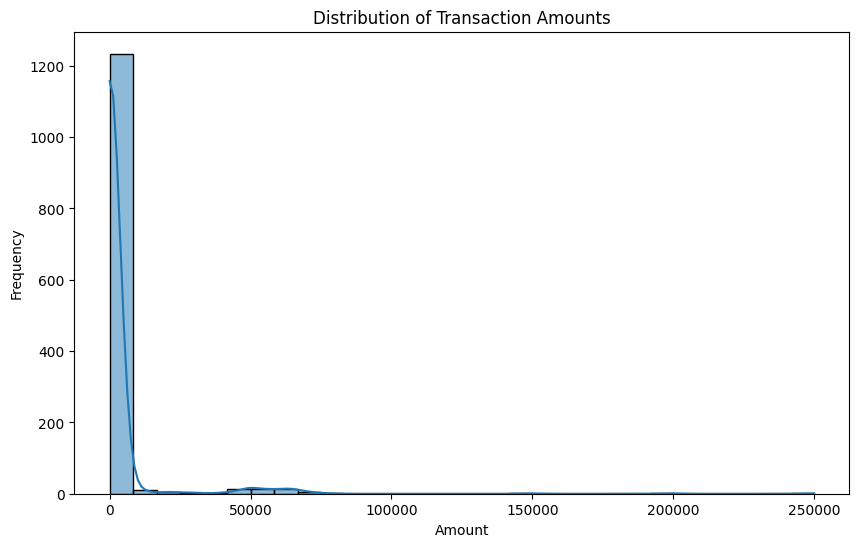

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Amount'], bins=30, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

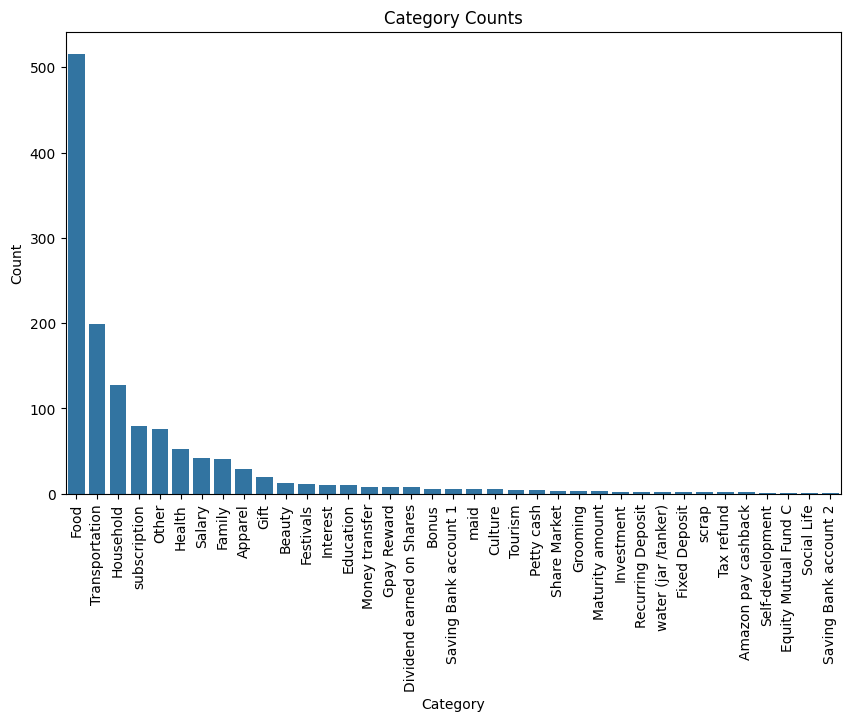

In [24]:
catg_count= data['Category'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=catg_count.index, y=catg_count.values)
plt.title('Category Counts')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()



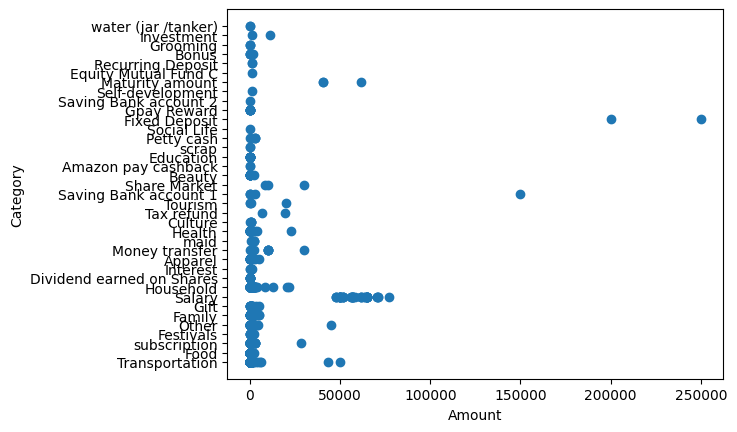

In [25]:
plt.scatter(data['Amount'],data['Category'])
plt.xlabel('Amount')
plt.ylabel('Category')
plt.show()

<ipython-input-41-fb63a2e69ff3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crrc_count.index, y=crrc_count.values, palette='viridis')


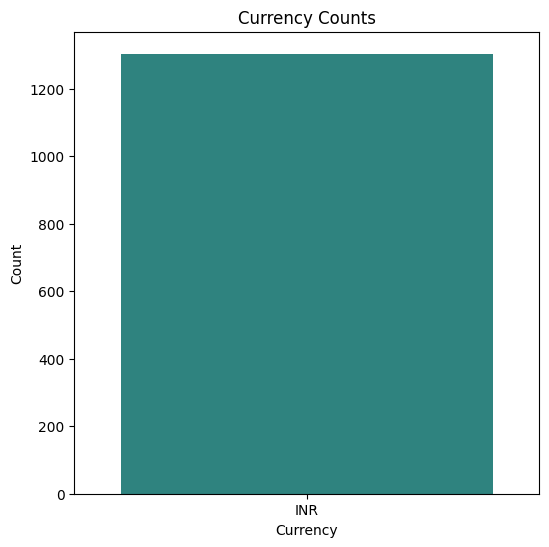

In [41]:
crrc_count = data['Currency'].value_counts()
plt.figure(figsize=(6, 6))
sns.barplot(x=crrc_count.index, y=crrc_count.values, palette='viridis')
plt.title('Currency Counts')
plt.xlabel('Currency')
plt.ylabel('Count')
plt.show()

In [27]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

In [28]:
scaler = StandardScaler()
data['Amount_normalized'] = scaler.fit_transform(data[['Amount']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

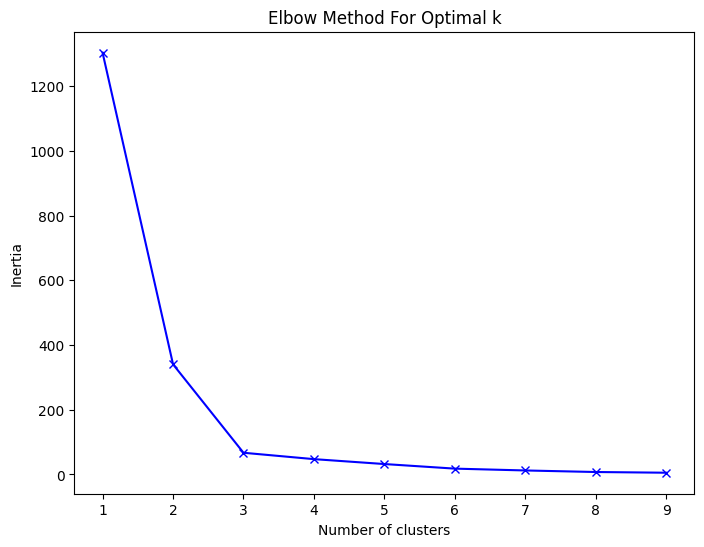

In [32]:
Inertia = []
i = range(1, 10)
for h in i:
    kmean = KMeans(n_clusters=h, random_state=42)
    kmean.fit(data[['Amount_normalized']])
    Inertia.append(kmean.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(i, Inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [33]:
kmean = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmean.fit_predict(data[['Amount_normalized']])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


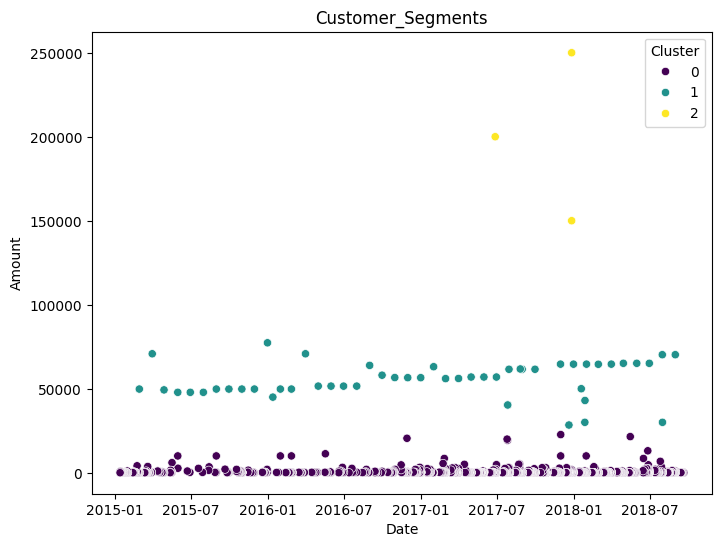

In [43]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Date', y='Amount', hue='Cluster', data=data, palette='viridis')
plt.title('Customer_Segments')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.show()


In [46]:
from sklearn.decomposition import PCA

Text(0.5, 1.0, 'Distribution of the expenses by categories')

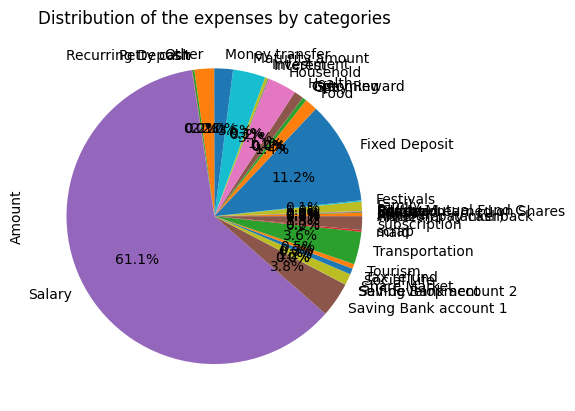

In [56]:
data.groupby('Category')['Amount'].sum().plot(kind='pie',autopct='%1.1f%%')

plt.title("Distribution of the expenses by categories")